In [8]:
import os 
import sys

In [9]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [10]:
from user.params.data import *

In [ ]:
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt
from shapely import Polygon

In [4]:
import h3.api.basic_str as h3

In [5]:
frames_df = pd.read_csv(f'{INSTALL_DIR}/{PROJECT_NAME}/df/2023-09-29/md.csv', engine='pyarrow')

NameError: name 'pd' is not defined

In [6]:
flooding = pd.read_csv('../data/coords/sep29_flooding.csv', engine='pyarrow')

NameError: name 'pd' is not defined

In [7]:
frames_gdf = gpd.GeoDataFrame(frames_df, geometry=gpd.points_from_xy(frames_df[LONGITUDE_COL], frames_df[LATITUDE_COL]), crs=COORD_CRS)
frames_gdf = frames_gdf.to_crs(PROJ_CRS)

NameError: name 'gpd' is not defined

In [13]:
flooding_gdf = gpd.GeoDataFrame(flooding, geometry=gpd.points_from_xy(flooding[LONGITUDE_COL_311], flooding[LATITUDE_COL_311]), crs=COORD_CRS)
flooding_gdf = flooding_gdf.to_crs(PROJ_CRS)

In [19]:
def h3_to_polygon(h3_id):
    return gpd.GeoSeries(h3.h3_to_geo_boundary(h3_id), crs=PROJ_CRS).unary_union

In [20]:
def crop_gdf(gdf, geometry):
    return gdf[gdf.geometry.within(geometry)] 


In [ ]:
h3_to_polygon('862a10747ffffff')

TypeError: Non geometry data passed to GeoSeries constructor, received data of dtype 'object'

In [22]:
h3.h3_to_geo_boundary('862a10747ffffff')

((40.62535829016474, -73.96804780122073),
 (40.617990065981616, -74.01258118935834),
 (40.586826006622616, -74.0262742404777),
 (40.563046358021275, -73.99547823402273),
 (40.570403829213035, -73.95099477817799),
 (40.60155169175349, -73.93725743459962))

In [18]:
frames_gdf_crop = crop_gdf(frames_gdf, h3_to_polygon('862a10747ffffff'))
flooding_gdf_crop = crop_gdf(flooding_gdf, h3_to_polygon('862a10747ffffff'))

TypeError: Non geometry data passed to GeoSeries constructor, received data of dtype 'object'

<Axes: >

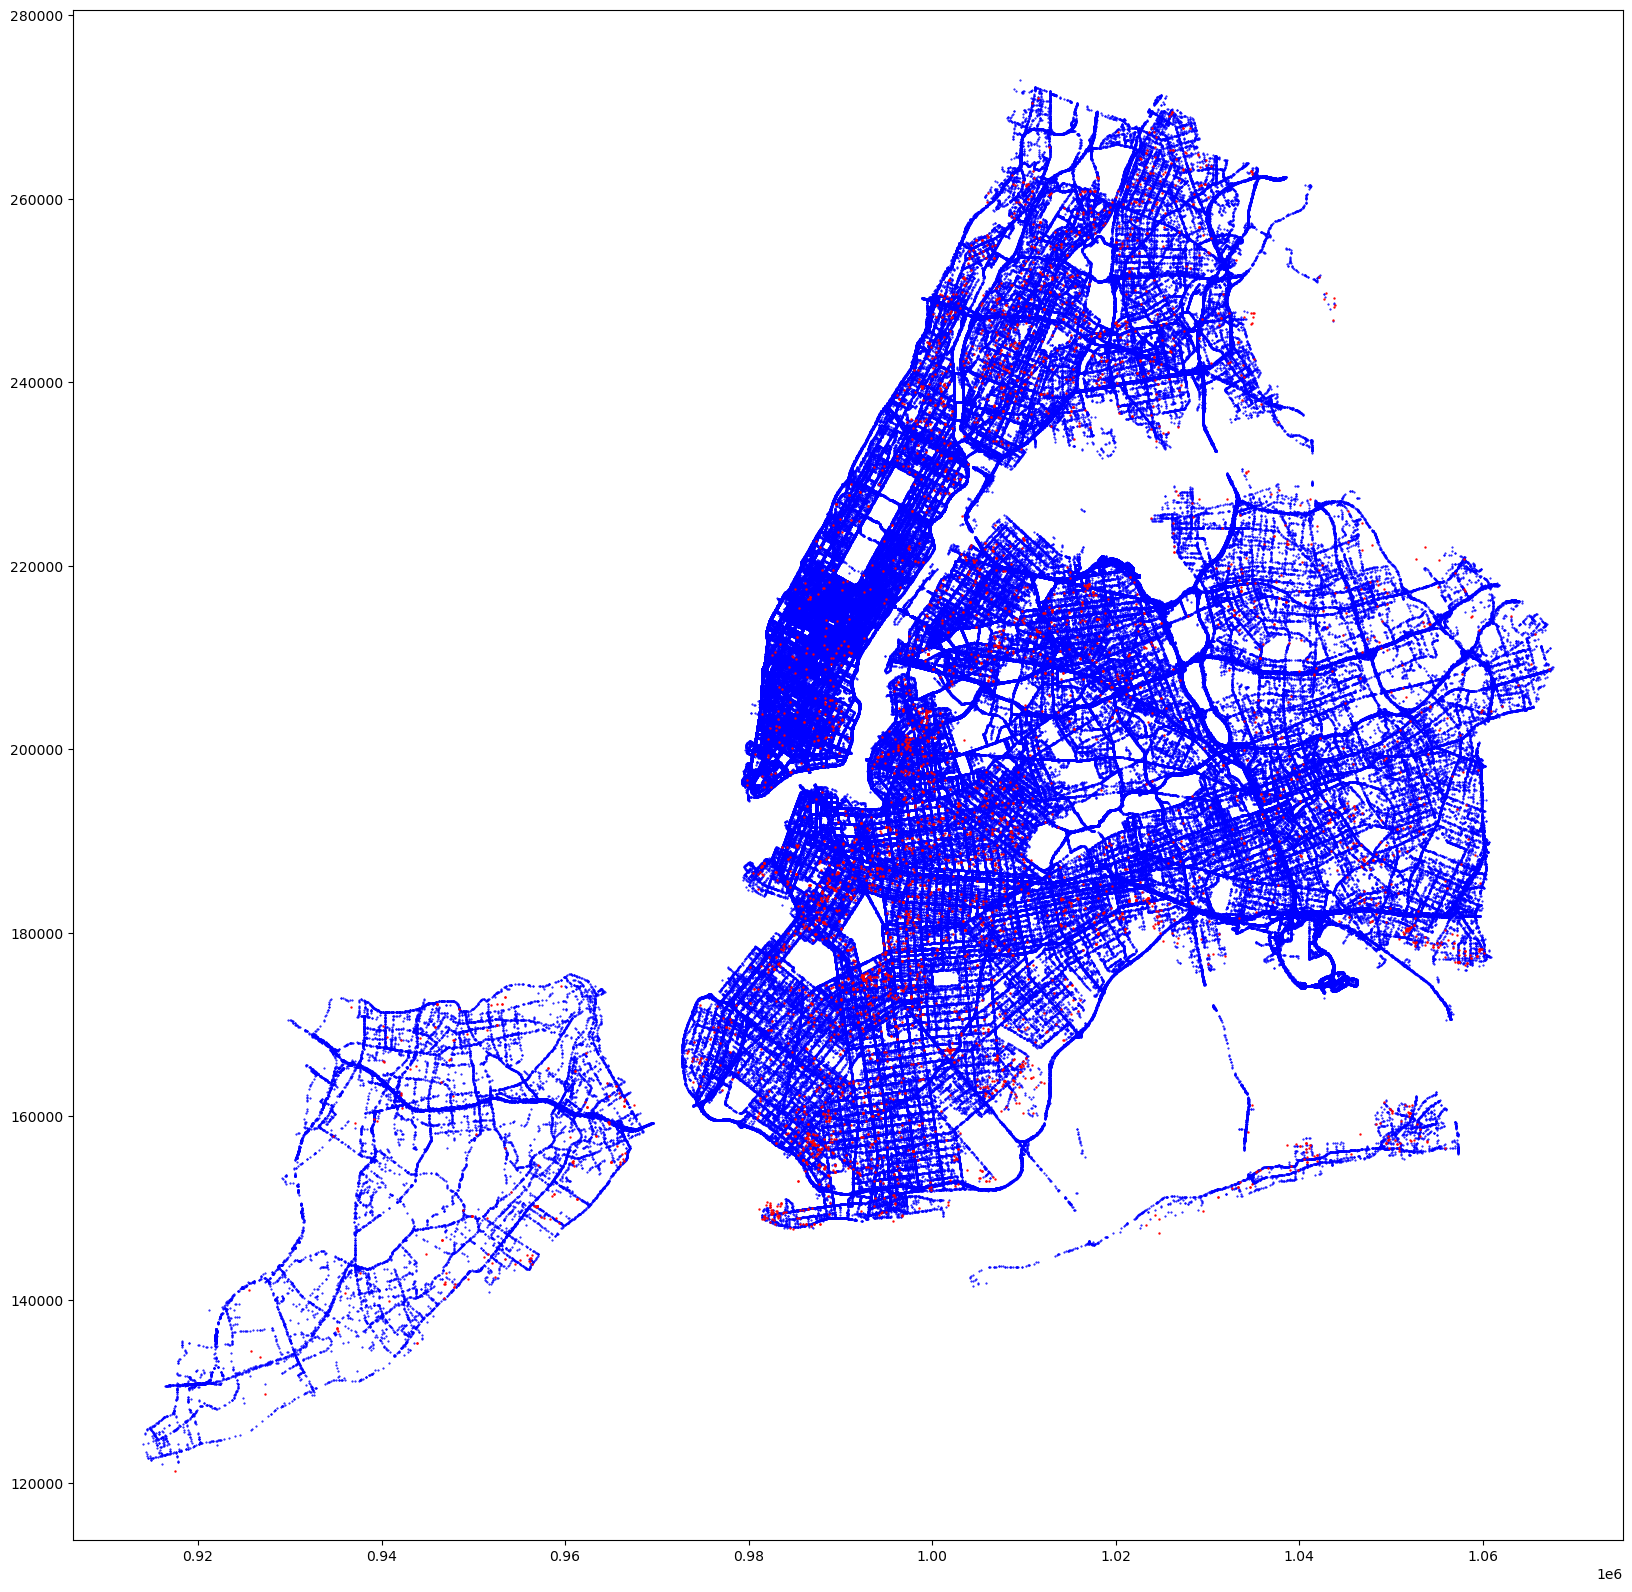

In [28]:
fig, ax = plt.subplots(figsize=(20,20))

frames_gdf.plot(ax=ax, color='blue', markersize=0.25)
flooding_gdf.plot(ax=ax, color='red', markersize=0.5)
